In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip "/content/drive/MyDrive/Pengolahan citra/UAS/archive.zip" -d "/content/dataset"

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: /content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: /content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: /content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: /content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: /content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-1

In [8]:
import os
os.listdir('/content/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)')

['valid', 'train']

In [9]:
!mv "/content/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train" /content/dataset/train
!mv "/content/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid" /content/dataset/valid

In [18]:
import os
os.listdir('/content/dataset')

['valid',
 'train',
 'new plant diseases dataset(augmented)',
 'New Plant Diseases Dataset(Augmented)',
 'test']

In [19]:
train_dir = '/content/dataset/train'
val_dir   = '/content/dataset/validation'

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)


In [21]:
!ls /content/dataset

'new plant diseases dataset(augmented)'   test	  valid
'New Plant Diseases Dataset(Augmented)'   train


In [25]:
!find /content/dataset -type d -name "train"

/content/dataset/train
/content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train


In [26]:
train_dir = '/content/dataset/train'
val_dir   = '/content/dataset/valid'
test_dir  = '/content/dataset/test'

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [29]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [30]:
base_model = MobileNet(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [31]:
for layer in base_model.layers:
    layer.trainable = False

In [32]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

In [33]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [39]:
history = model.fit(
    train_generator,
    steps_per_epoch=40,
    epochs=5,
    validation_data=val_generator,
    validation_steps=15
)

Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.9263 - loss: 0.2325 - val_accuracy: 0.9500 - val_loss: 0.1290
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.9502 - loss: 0.1233 - val_accuracy: 0.9396 - val_loss: 0.1893
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9527 - loss: 0.1363 - val_accuracy: 0.9271 - val_loss: 0.1769
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.9506 - loss: 0.1588 - val_accuracy: 0.9688 - val_loss: 0.1102
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.9520 - loss: 0.1345 - val_accuracy: 0.9396 - val_loss: 0.1657


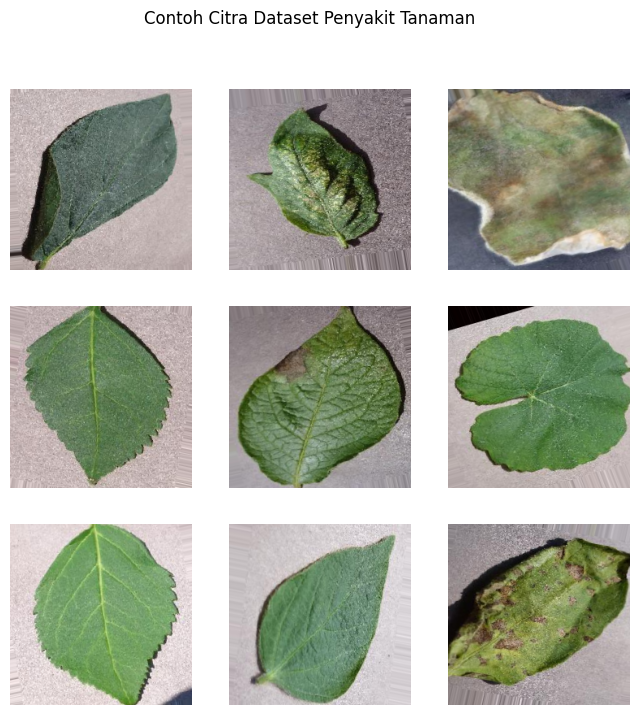

In [42]:
import matplotlib.pyplot as plt
import numpy as np

images, labels = next(train_generator)

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.suptitle("Contoh Citra Dataset Penyakit Tanaman")
plt.show()

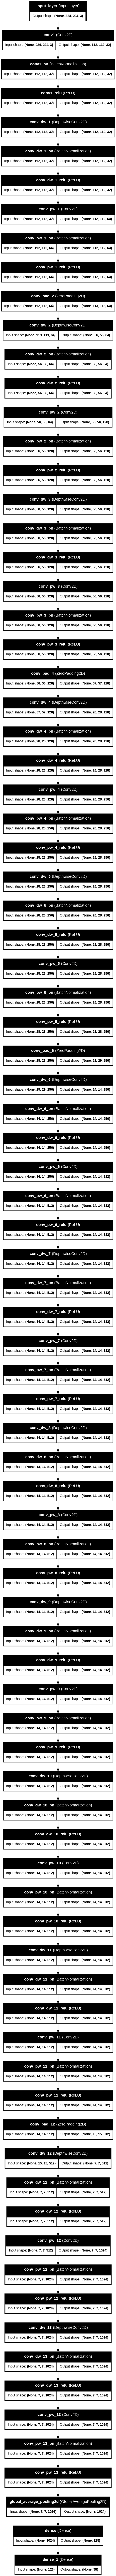

In [43]:
from tensorflow.keras.utils import plot_model

plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
    dpi=80
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


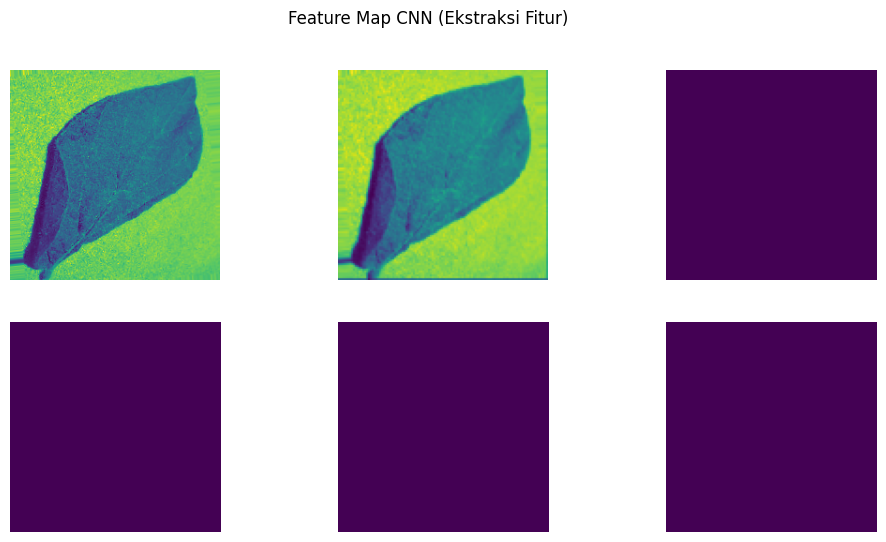

In [44]:
from tensorflow.keras.models import Model

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(images[:1])

plt.figure(figsize=(12,6))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(activations[i][0,:,:,0], cmap='viridis')
    plt.axis('off')
plt.suptitle("Feature Map CNN (Ekstraksi Fitur)")
plt.show()

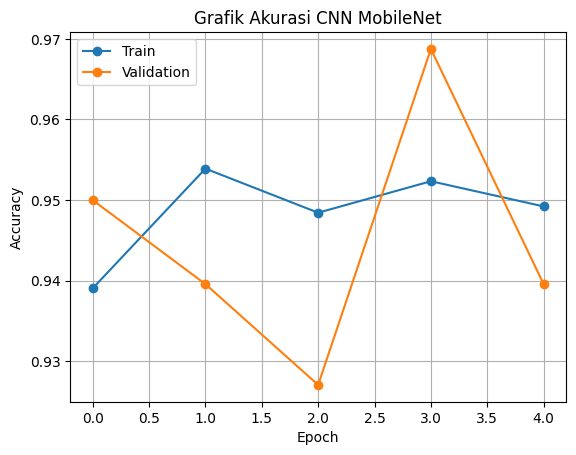

In [45]:
epochs_range = range(len(history.history['accuracy']))

plt.plot(epochs_range, history.history['accuracy'], marker='o')
plt.plot(epochs_range, history.history['val_accuracy'], marker='o')
plt.title('Grafik Akurasi CNN MobileNet')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'])
plt.grid(True)
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 4s/step


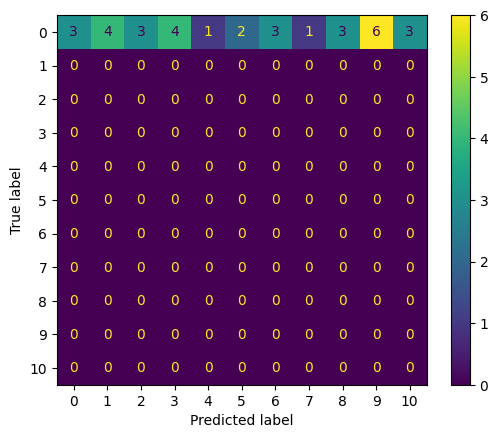

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=1)

cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

Kelas asli : test
Nama file  : CornCommonRust3.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 873ms/step


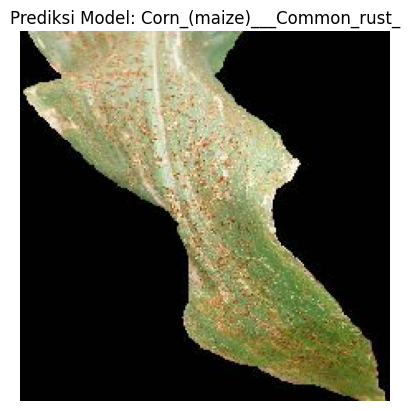

In [51]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Folder test
test_dir = "/content/dataset/test"

# Pilih kelas secara acak
random_class = random.choice(os.listdir(test_dir))
class_path = os.path.join(test_dir, random_class)

# Pilih 1 gambar dari kelas tersebut
img_name = random.choice(os.listdir(class_path))
img_path = os.path.join(class_path, img_name)

print("Kelas asli :", random_class)
print("Nama file  :", img_name)

# Load & preprocessing gambar
img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Prediksi
prediction = model.predict(img_array)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(prediction)]

# Tampilkan gambar
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediksi Model: {predicted_class}")
plt.show()